# Who wrote that?
## Identifying Authorship and Studying Style with Stylometry

This lesson is adapted from François Dominic Laramée's ["Introduction to stylometry with Python"](https://programminghistorian.org/en/lessons/introduction-to-stylometry-with-python) lesson published on the [*Programming Historian*](https://programminghistorian.org/) webpage (in 2018). It is also available in French and Portuguese. All sections labeled with the initial **[PH]** are copied directly from this lesson, while those labeled **[~PH~]** are modified versions of this lesson. If you benefit from this lesson, please consider supporting the *Programming Historian*.

## Introduction to stylometry

Stylometry is the study of literary style using computational methods. Among other things, it provides a means for estimating identifying the most likely author of an unattributed text from a selection of attributed works by known authors. 

As Laramée explains [PH]:

```
[Stylometry] is based on the observation that authors tend to write in relatively consistent, recognizable and unique ways. For example:

    * Each person has their own unique vocabulary, sometimes rich, sometimes limited. Although a larger vocabulary is usually associated with literary quality, this is not always the case. Ernest Hemingway is famous for using a surprisingly small number of different words in his writing, which did not prevent him from winning the Nobel Prize for Literature in 1954.
    * Some people write in short sentences, while others prefer long blocks of text consisting of many clauses.
    * No two people use semicolons, em-dashes, and other forms of punctuation in the exact same way.

```

As you may already observed, the study of an author's writing style requires an examination of text elements we normally ignore in computational text analysis. For example:
+ **stopwords**: for most other forms of text analysis it helps to remove or ignore "stopwords" (words like "and", "a", "the", "this", and "upon - conjunctions, prepositions, articles, etc.). These words reveal little about the context of a text. However, they are essential stylistic markers of authorship.
+ **punctuation:** we often remove punctuation when tokenizing texts into individual words. However, the use of different types of punctuation often distinguishes one author from another. 
+ **sentence length** and **diversity of vocabulary**: (see above)

***Note: Stylometry can predict the probability an anonymous text was written by a particular author from within a selection of authors for which we have sample documents. But, it can never say so for certain!***

It is also comparative?? It can only identify a likely author if texts known to have been written by that author are available for comparison with the unattributed text(s).

## Identification vs. Security and Anonymization

Identifying the author of historical texts, such as the Federalist Papers, advances our understanding of the historical past.

It can also help:
+ educators to detect [plagiarism, cheating, and the use of ghost-writers](https://files.eric.ed.gov/fulltext/EJ1260339.pdf). 
+ law enforcement to: 
    + verify the author of a will or confession
    + identify the criminal who wrote an anonymous letter or manifesto (like the "Unabomber")
    + identify the origin of fake news and conspiracy theories (i.e. [QAnon](https://www.nytimes.com/2022/02/19/technology/qanon-messages-authors.html?searchResultPosition=1))
+ Some scholars are currently experimenting with [the use of stylometric methods to identify the Large Language Model (LLM) used to create an AI-generated text](https://arxiv.org/pdf/2308.07305.pdf), while acknowledging [the limits of these methods to identify machine-generated texts](https://direct.mit.edu/coli/article/46/2/499/93369/The-Limitations-of-Stylometry-for-Detecting).    
    

However, in other cases, applying stylometry to identify living authors who have chosen to publish anonymously could cause harm to innocent people. Government security agencies have almost certainly used it to identify dissidents. Organizations could also use stylometry to identify and target anonymous critics or whistleblowers. 

Furthermore, since one could argue that the automated recognition of a person's writing style is a personal attribute like their fingerprints, DNA, or face (as used by facial reocgnition). If so, a person's writing style should perhaps be protected by the same regulations that protect biometric data processing. 

For this reason, the [legal and ethical implications of the uses of stylometry need to be explored further](https://www.law.kuleuven.be/citip/blog/show-me-how-you-write-and-ill-tell-you-who-you-are/).

Some developers have developed software and programming packages (such as [Anonymouth](https://github.com/spencermwoo/anonymouth)) to conceal linguistic markers of a person's writing style and, thus, help them maintain their anonymity.

## The Data: The Federalist Papers




[~PH~]

85 documents from the Federalist Papers, including:
* 51 written by Alexander Hamilton
* 14 written by James Madison
* 4 of 5? written by John Jay
* 3 probably co-written by Madison and Hamilton (but Madison claimed principal authorship)
* 12 papers with disputed authorship (Hamilton or Madison)
* 5th paper written by John Jay (kept separate for reasons that will be explained)

[discuss methods; PH uses 3 diff methods; choose 1, 2, all 3?]

1. Mendenhall's Method: comparing frequency of words of different lengths
2. Kilgariff's Chi-Squared Method: measures how similar or different the vocabularies of two or more texts are
3. John Burrow's Delta Method: measures the distance between a target text and a selection of other texts. Unlike the chi-squared method, however, the Delta Method does not weigh common or "stopwords" (such as "the", "and", "this", etc.) more heavily than less-frequently used words.

In [244]:
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pandas as pd   #working with dataframes
import nltk           # text analysis / NLP
nltk.download('punkt')
import collections    # for creating frequency lists

from pathlib import Path
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\F0040RP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [245]:
fedpapers_dir = Path("~/shared/RR-workshop-data/federalist-papers").expanduser() 
pathlist = sorted(fedpapers_dir.glob('*.txt'))  
print([file.name for file in pathlist])

['federalist.txt', 'federalist_1.txt', 'federalist_10.txt', 'federalist_11.txt', 'federalist_12.txt', 'federalist_13.txt', 'federalist_14.txt', 'federalist_15.txt', 'federalist_16.txt', 'federalist_17.txt', 'federalist_18.txt', 'federalist_19.txt', 'federalist_2.txt', 'federalist_20.txt', 'federalist_21.txt', 'federalist_22.txt', 'federalist_23.txt', 'federalist_24.txt', 'federalist_25.txt', 'federalist_26.txt', 'federalist_27.txt', 'federalist_28.txt', 'federalist_29.txt', 'federalist_3.txt', 'federalist_30.txt', 'federalist_31.txt', 'federalist_32.txt', 'federalist_33.txt', 'federalist_34.txt', 'federalist_35.txt', 'federalist_36.txt', 'federalist_37.txt', 'federalist_38.txt', 'federalist_39.txt', 'federalist_4.txt', 'federalist_40.txt', 'federalist_41.txt', 'federalist_42.txt', 'federalist_43.txt', 'federalist_44.txt', 'federalist_45.txt', 'federalist_46.txt', 'federalist_47.txt', 'federalist_48.txt', 'federalist_49.txt', 'federalist_5.txt', 'federalist_50.txt', 'federalist_51.txt',

## Preparing the Data for Analysis [PH]

Before we can proceed with stylometric analysis, we need to load the files containing all 85 papers into convenient data structures in computer memory.

The first step in this process is to assign each of the 85 papers to the proper set. Since we have given each paper standardized names from federalist_1.txt to federalist_85.txt, it is possible to assign each paper to its author (or to its test set, if we want to learn its author’s identity) using a **Python dictionary**. The dictionary is a data type made up of an arbitrary number of key-value pairs; in this case, the names of authors will serve as keys, while the lists of paper numbers will be the values associated with these keys.

In [246]:
papers = {
    'Madison': [10, 14, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
    'Hamilton': [1, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 21, 22, 23, 24,
                 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60,
                 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
                 78, 79, 80, 81, 82, 83, 84, 85],
    'Jay': [2, 3, 4, 5],
    'Shared': [18, 19, 20],
    'Disputed': [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63],
    'TestCase': [64]
}


Python dictionaries are very flexible. For example, we can access a value by indexing the dictionary with one of its keys, we can scan the entire dictionary by looping over its list of keys, etc. We will make ample use of this functionality as we move along.

Next, as we are interested in each author’s vocabulary, we will define a short Python function that creates a long listing of the words in each of the papers assigned to a single author. This will be stored as a string.

In [247]:
# A function that compiles all of the text files associated with a single author into a single string
"""
def read_files_into_string(filenames):
    strings = []
    for filename in filenames:
        with open(f'data/federalist_{filename}.txt', 'r') as f:
            strings.append(f.read())
    return '\n'.join(strings)
"""

def read_files_into_string(filenames):
    strings = []
    #for filename in filenames:
    for filename in filenames:
        #with open(path, 'r') as f:
        #    strings.append(f.read())
        with open(Path(fedpapers_dir, f'federalist_{filename}.txt'), 'r') as f:
            strings.append(f.read())
    return '\n'.join(strings)

Third, we build a new data structure by repeatedly calling the ```read_files_into_string()``` function, passing it a different list of papers every time. We will store the results into another dictionary, this one with author/test case names as keys and all of the text of the relevant papers as values. For simplicity’s sake, we will refer to the string containing a list of papers as “the author’s corpus”, even when we are dealing with disputed or shared papers rather than with an individual’s known contribution.

In [248]:
#papers.items()

In [249]:
# Make a dictionary out of the authors' corpora

#pathlist = sorted(fedpapers_dir.glob('*.txt'))      # .glob only stores the pathlist temporarily (for some reason), so you need to call it again!2

#for path in pathlist:
#    print(path.name)

federalist_by_author = {}
for author, files in papers.items():
    federalist_by_author[author] = read_files_into_string(files)
    #federalist_by_author[author] = read_files_into_string(pathlist)

To make sure that the files loaded properly, print the first hundred characters of each dictionary entry to screen:

In [250]:
for author in papers:
    print("**", author, "**")
    print(federalist_by_author[author][:100])

** Madison **
 10

The Same Subject Continued (The Union as a Safeguard Against Domestic
Faction and Insurrection)
** Hamilton **
 1

General Introduction

For the Independent Journal. Saturday, October 27, 1787


HAMILTON

To the
** Jay **
 2

Concerning Dangers from Foreign Force and Influence

For the Independent Journal. Wednesday, Oct
** Shared **
 18

The Same Subject Continued (The Insufficiency of the Present
Confederation to Preserve the Unio
** Disputed **
 49

Method of Guarding Against the Encroachments of Any One Department of
Government by Appealing t
** TestCase **
 64

The Powers of the Senate

From The Independent Journal. Wednesday, March 5, 1788.

JAY

To the 


If this printing operation yields anything at all, then the file input operation has worked as expected and you can move on to stylometric analysis.

*If the files fail to load, the most likely reason is that your current working directory is not the `data` repository created by unzipping the archive from the Required Materials section above; changing your working directory should do the trick. How you do this depends on your Python development environment.*

## First Stylometric Test: Mendenhall’s Characteristic Curves of Composition [PH]

Literary scholar T. C. Mendenhall once wrote that an author’s stylistic signature could be found by counting how often he or she used words of different lengths.14 For example, if we counted word lengths in several 1,000-word or 5,000 word segments of any novel, and then plotted a graph of the word length distributions, the curves would look pretty much the same no matter what parts of the novel we had picked. Indeed, Mendenhall thought that if one counted enough words selected from various parts of a writer’s entire life’s work (say, 100,000 or so), the author’s “characteristic curve” of word length usage would become so precise that it would be constant over his or her lifetime.

By today’s standards, **counting word lengths** seems like a very blunt way of measuring literary style. Mendenhall’s method does not take the actual words in an author’s vocabulary into account, which is obviously problematic. Therefore, we should not treat the characteristic curves as a particularly trustworthy source of stylometric evidence. However, Mendenhall published his theory over one hundred and thirty years ago and made all calculations by hand. It is understandable that he would have chosen to work with a statistic that, however coarse, was at least easy to compile. In honor of the historical value of his early attempt at stylometry, and because the characteristic curve yields interesting visual results that can be implemented quickly, we will use Mendenhall’s method as a first step in our exploration of authorship attribution techniques.

The code required to calculate characteristic curves for the Federalist’s authors is as follows:

*[JM Note:]
The code below iterates through the dictionary of text we created (which we called `federalist_by_author`). Calling, `federalist_by_author["Hamilton"]` for example returns all 51 texts written by Hamilton, combined into one long text string. It then creates a second dictionary `federalist_by_author_tokens` with a list of tokens for each author's texts and a third dictionary, `federalist_by_author_length_distributions` containing a frequency distribution graph for each author's texts.*

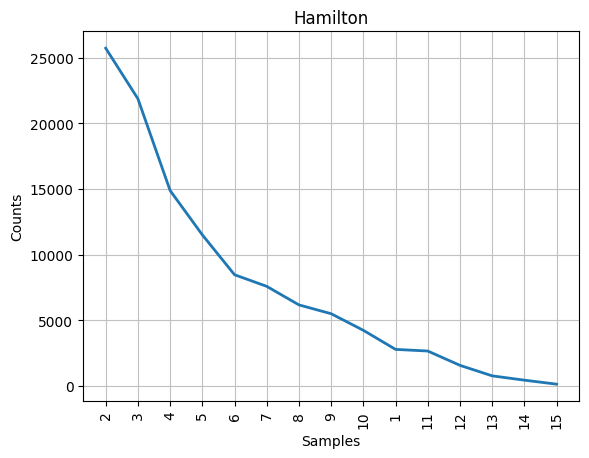

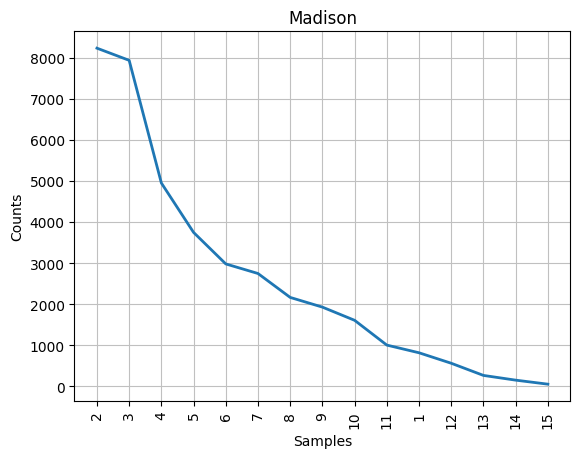

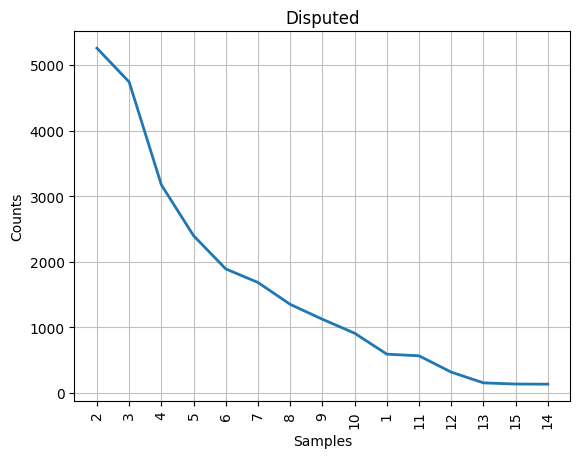

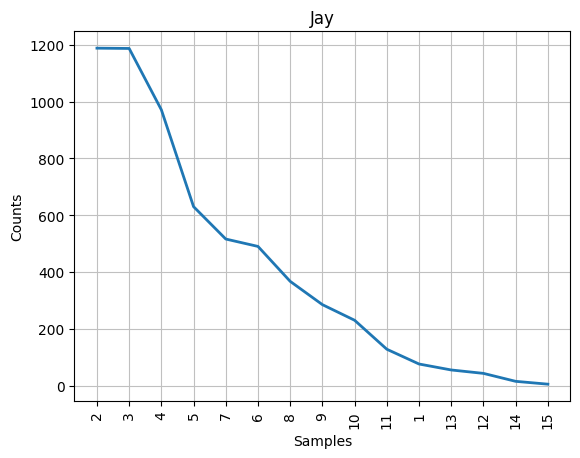

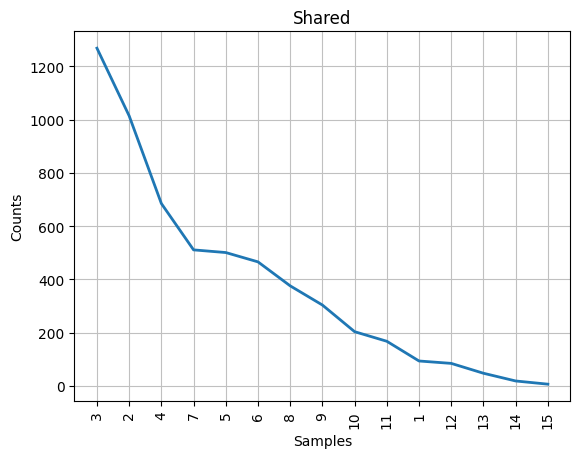

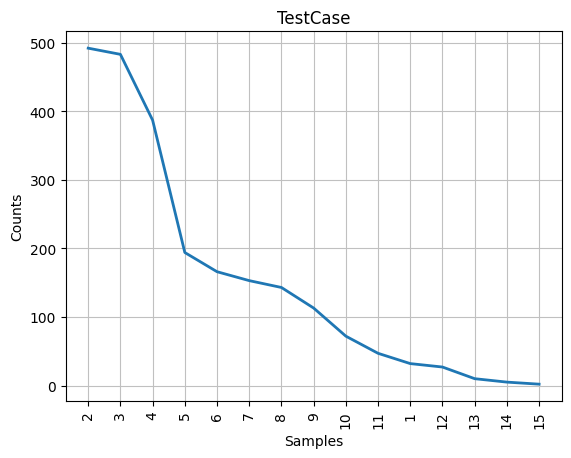

In [251]:

# Compare the disputed papers to those written by everyone,
# including the shared ones.
authors = ("Hamilton", "Madison", "Disputed", "Jay", "Shared", "TestCase")  ###added in "TestCase"

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
for author in authors:
    tokens = nltk.word_tokenize(federalist_by_author[author])

    # Filter out punctuation  #$$ but this also filters out numbers, should we use isalnum() instead?
    federalist_by_author_tokens[author] = ([token for token in tokens
                                            if any(c.isalpha() for c in token)])

    # Get a distribution of token lengths
    token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
    federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)
    federalist_by_author_length_distributions[author].plot(15,title=author)

#$$ the author expected matplotlib to graph all authors; but only one appears below
#$$ also author sorted x axis by frequency count; shd it be sorted by word count??
#$$ may be overlay them??

You may notice some problems with the above graphs:
+ the x-axis labels vary from plot to plot. It would be more logical to order the x axis in order from smallest to largest.
+ the y axis also varies (as a result of the differing sizes of the texts)
+ the graphs are hard to compare to each other

Below, I created some alternate graphs. However, since it is easier to create plots in Python from data stored in dataframes, I will first place data about the Federalist papers into a dataframe. The steps I followed are:

1. setup dataframe, one row for each identified author
    + add a column for the full text of each paper
    + add a column of each text divided into a list of tokens (words + numbers but not punctuation)
    + calculate a frequency distribution of words of different length for each author. How often did James Madison, for example, write words of 1, 2, 3, 4, etc., characters in length? This will look something like this:
        ```
        author  tok_len_freqs
        Madison {1:84, 2: 237, 3: 489, 4:374, ...}
        ```
    + this means the Federalist Papers known to have been written by Madison contain 84 words of one character in length, 237 of two characters, 489 of three characters, etc.

2. expand the dataframe from one row per one author to one row for each author and words of different token lengths, the dataframe example would be transformed into something like this:

```
author  tok_len  freq
Madison     1       84
Madison     2       237
Madison     3       489       
Madison     4       374
...

```
3. graph frequency distributions (but this time all authors in one graph)




The ```‘%matplotlib inline’``` declaration below ‘import nltk’ is required if your development environment is a Jupyter Notebook, as it was for me while writing this tutorial; otherwise you may not see the graphs on your screen. If you work in Jupyter Lab, please replace this clause with ‘%matplotlib ipympl’.

The first line in the code snippet above loads the Natural Language Toolkit module (nltk), which contains an enormous number of useful functions and resources for text processing. We will barely touch its basics in this lesson; if you decide to explore text analysis in Python further, I strongly recommend that you start with nltk’s documentation.

The next few lines set up data structures that will be filled by the block of code within the for loop. This loop makes the same calculations for all of our “authors”:

+ It invokes nltk’s word_tokenize() method to chop an author’s corpus into its component tokens, i.e., words, numbers, punctuation, etc.;
+ It looks at this list of tokens and filters out non-words;
+ It creates a list containing the lengths of every word token that remains;
+ It creates a frequency distribution object from this list of word lengths, basically counting how many one-letter words, two-letter words, etc., there are in the author’s corpus.
+ It plots a graph of the distribution of word lengths in the corpus, for all words up to length 15.

nltk.word_tokenize() uses English rules by default. If you want to tokenize texts in another language, you will need to change one line in the code above to feed the proper language to the tokenizer as a parameter. For example: tokens = nltk.word_tokenize(federalist_by_author[author], language='french'). Read the nltk’s documentation for more details.



As you can see from the graphs, the characteristic curve associated with the disputed papers looks like a compromise between Madison’s and Hamilton’s. The leftmost part of the disputed papers’ graph, which accounts for the most frequent word lengths, looks a bit more similar to Madison’s; the tail end of the graph, like Hamilton’s. This is consistent with the historical observation that Madison and Hamilton had similar styles, but it does not help us much with our authorship attribution task. The best that we can say is that John Jay almost certainly did not write the disputed papers, because his curve looks nothing like the others; lengths 6 and 7 are even inverted in his part of the corpus, compared to everyone else’s.

If we had no additional information to work with, we would tend to conclude that the disputed papers are probably Madison’s work, albeit without much confidence. Fortunately, stylometric science has advanced a great deal since Mendenhall’s time.

## Second Stylometric Test: Kilgariff’s Chi-Squared Method

In a 2001 paper, Adam Kilgarriff15 recommends using the chi-squared statistic to determine authorship. Readers familiar with statistical methods may recall that chi-squared is sometimes used to test whether a set of observations (say, voters’ intentions as stated in a poll) follow a certain probability distribution or pattern. This is not what we are after here. Rather, we will simply use the statistic to measure the “distance” between the vocabularies employed in two sets of texts. The more similar the vocabularies, the likelier it is that the same author wrote the texts in both sets. This assumes that a person’s vocabulary and word usage patterns are relatively constant.

Here is how to apply the statistic for authorship attribution:

    + Take the corpora associated with two authors.
    + Merge them into a single, larger corpus.
    + Count the tokens for each of the words that can be found in this larger corpus.
    + Select the n most common words in the larger corpus.
    + Calculate how many tokens of these n most common words we would have expected to find in each of the two original corpora if they had come from the same author. This simply means dividing the number of tokens that we have observed in the combined corpus into two values, based on the relative sizes of the two authors’ contributions to the common corpus.

    + Calculate a chi-squared distance by summing, over the n most common words, the squares of the differences between the actual numbers of tokens found in each author’s corpus and the expected numbers, divided by the expected numbers. Figure 6 shows the equation for the chi-squared statistic, where C(i) represents the observed number of tokens for feature ‘i’, and E(i), the expected number for this feature.

<img src="https://programminghistorian.org/images/introduction-to-stylometry-with-python/stylometry-python-6.jpg" alt="Figure 6: Equation for the chi-squared statistic.">

Figure 6: Equation for the chi-squared statistic.

The smaller the chi-squared value, the more similar the two corpora. Therefore, we will calculate a chi-squared for the difference between the Madison and Disputed corpora, and another for the difference between the Hamilton and Disputed corpora; the smaller value will indicate which of Madison and Hamilton is the most similar to Disputed.

Note: No matter which stylometric method we use, the choice of n, the number of words to take into consideration, is something of a dark art. In the literature surveyed by Stamatatos2, scholars have suggested between 100 and 1,000 of the most common words; one project even used every word that appeared in the corpus at least twice. As a guideline, the larger the corpus, the larger the number of words that can be used as features without running the risk of giving undue importance to a word that occurs only a handful of times. In this lesson, we will use a relatively large n for the chi-squared method and a smaller one for the next method. Changing the value of n will certainly change the numeric results a little; however, if a small modification of n causes a change in authorship attribution, this is a sign that the test you are performing is unable to provide meaningful evidence regarding your test case.

The following code snippet implements Kilgariff’s method, with the frequencies of the 500 most common words in the joint corpus being used in the calculation:

In [252]:
federalist_by_author_tokens['Disputed']

['Method',
 'of',
 'Guarding',
 'Against',
 'the',
 'Encroachments',
 'of',
 'Any',
 'One',
 'Department',
 'of',
 'Government',
 'by',
 'Appealing',
 'to',
 'the',
 'People',
 'Through',
 'a',
 'Convention',
 'For',
 'the',
 'Independent',
 'Journal',
 'Saturday',
 'February',
 'MADISON',
 'To',
 'the',
 'People',
 'of',
 'the',
 'State',
 'of',
 'New',
 'York',
 'THE',
 'author',
 'of',
 'the',
 'Notes',
 'on',
 'the',
 'State',
 'of',
 'Virginia',
 'quoted',
 'in',
 'the',
 'last',
 'paper',
 'has',
 'subjoined',
 'to',
 'that',
 'valuable',
 'work',
 'the',
 'draught',
 'of',
 'a',
 'constitution',
 'which',
 'had',
 'been',
 'prepared',
 'in',
 'order',
 'to',
 'be',
 'laid',
 'before',
 'a',
 'convention',
 'expected',
 'to',
 'be',
 'called',
 'in',
 'by',
 'the',
 'legislature',
 'for',
 'the',
 'establishment',
 'of',
 'a',
 'constitution',
 'for',
 'that',
 'commonwealth',
 'The',
 'plan',
 'like',
 'every',
 'thing',
 'from',
 'the',
 'same',
 'pen',
 'marks',
 'a',
 'turn',

In [253]:
# Who are the authors we are analyzing?
#authors = ("Hamilton", "Madison")
authors = ("Hamilton", "Madison", "Jay", "Shared", "Disputed", "TestCase")


# Lowercase the tokens so that the same word, capitalized or not,
# counts as one word
for author in authors:
    federalist_by_author_tokens[author] = (
        [token.lower() for token in federalist_by_author_tokens[author]])
federalist_by_author_tokens["Disputed"] = (
    [token.lower() for token in federalist_by_author_tokens["Disputed"]])

# Calculate chisquared for each of the two candidate authors
for author in authors:

    # First, build a joint corpus and identify the 500 most frequent words in it
    joint_corpus = (federalist_by_author_tokens[author] +
                    federalist_by_author_tokens["Disputed"])
    joint_freq_dist = nltk.FreqDist(joint_corpus)
    most_common = list(joint_freq_dist.most_common(500))

    # What proportion of the joint corpus is made up
    # of the candidate author's tokens?
    author_share = (len(federalist_by_author_tokens[author])
                    / len(joint_corpus))

    # Now, let's look at the 500 most common words in the candidate
    # author's corpus and compare the number of times they can be observed
    # to what would be expected if the author's papers
    # and the Disputed papers were both random samples from the same distribution.
    chisquared = 0
    for word,joint_count in most_common:

        # How often do we really see this common word?
        author_count = federalist_by_author_tokens[author].count(word)
        disputed_count = federalist_by_author_tokens["Disputed"].count(word)

        # How often should we see it?
        expected_author_count = joint_count * author_share
        expected_disputed_count = joint_count * (1-author_share)

        # Add the word's contribution to the chi-squared statistic
        chisquared += ((author_count-expected_author_count) *
                       (author_count-expected_author_count) /
                       expected_author_count)

        chisquared += ((disputed_count-expected_disputed_count) *
                       (disputed_count-expected_disputed_count)
                       / expected_disputed_count)

    print("The Chi-squared statistic for candidate", author, "is", chisquared)


The Chi-squared statistic for candidate Hamilton is 3434.6850314768426
The Chi-squared statistic for candidate Madison is 1907.5992915766838
The Chi-squared statistic for candidate Jay is 2301.7237215602418
The Chi-squared statistic for candidate Shared is 2333.9015497448045
The Chi-squared statistic for candidate Disputed is 0.0
The Chi-squared statistic for candidate TestCase is 1556.673144924762


*In the snippet above, we convert everything to lowercase so that we won't count word tokens that begin with a capital letter because they appear at the beginning of a sentence and lowercased tokens of the same word as two different words. Sometimes this may cause a few errors, for example when a proper noun and a common noun are written the same way except for capitalization, but usually it increases accuracy.*

As we can see from the above results, the chi-squared distance between the Disputed and Hamilton corpora is considerably larger than the distance between the Madison and Disputed corpora. This is a strong sign that, if a single author is responsible for the 12 papers in the Disputed corpus, that author is Madison rather than Hamilton.

However, chi-squared is still a coarse method. For one thing, words that appear very frequently tend to carry a disproportionate amount of weight in the final calculation. Sometimes this is fine; other times, subtle differences in style represented by the ways in which authors use more unusual words will go unnoticed.

### A Note about Parts of Speech


In some languages, it may be useful to apply parts-of-speech tagging to the word tokens before counting them, so that the same word used as two different parts of speech may count as two different features. For example, in French, very common words like “la” and “le” serve both as articles (in which case they would translate into English as “the”) and as pronouns (“it”). This lesson does not use part-of-speech tagging because it is rarely useful for stylometric analysis in contemporary English and because nltk’s default tagger does not support other languages very well.

Should you need to apply part-of-speech tagging to your own data, you may be able to download taggers for other languages, to work with a third-party tool like Tree Tagger, or even to train your own tagger, but these techniques are far beyond the scope of the current lesson.

## Third Stylometric Test: John Burrows’ Delta Method (Advanced)

The first two stylometric methods were easy to implement. This next one, based on John Burrows’ Delta statistic16, is considerably more involved, both conceptually (the mathematics are more complicated) and computationally (more code required). It is, however, one of the most prominent stylometric methods in use today.

**Like Kilgariff’s chi-squared, Burrows’ Delta is a measure of the “distance” between a text whose authorship we want to ascertain and some other corpus. Unlike chi-squared, however, the Delta Method is designed to compare an anonymous text (or set of texts) to many different authors’ signatures at the same time.** More precisely, Delta measures how the anonymous text and sets of texts written by an arbitrary number of known authors all diverge from the average of all of them put together. Furthermore, the Delta Method gives equal weight to every feature that it measures, thus avoiding the problem of common words overwhelming the results, which was an issue with chi-squared tests. For all of these reasons, John Burrows’ Delta Method is usually a more effective solution to the problem of authorship.

Burrows’ original algorithm can be summarized as follows:

+ Assemble a large corpus made up of texts written by an arbitrary number of authors; let’s say that number of authors is x.
+ Find the n most frequent words in the corpus to use as features.
+ For each of these n features, calculate the share of each of the x authors’ subcorpora represented by this feature, as a percentage of the total number of words. As an example, the word “the” may represent 4.72% of the words in Author A’s subcorpus.
+ Then, calculate the mean and the standard deviation of these x values and use them as the offical mean and standard deviation for this feature over the whole corpus. In other words, we will be using a mean of means instead of calculating a single value representing the share of the entire corpus represented by each word. 
    + This is because we want to avoid a larger subcorpus, like Hamilton’s in our case, over-influencing the results in its favor and defining the corpus norm in such a way that everything would be expected to look like it.

+ For each of the n features and x subcorpora, calculate a z-score describing how far away from the corpus norm the usage of this particular feature in this particular subcorpus happens to be. To do this, subtract the “mean of means” for the feature from the feature’s frequency in the subcorpus and divide the result by the feature’s standard deviation. Figure 7 shows the z-score equation for feature ‘i’, where C(i) represents the observed frequency, the greek letter mu represents the mean of means, and the greek letter sigma, the standard deviation.
    

<img src = "https://programminghistorian.org/images/introduction-to-stylometry-with-python/stylometry-python-7.jpg">

Figure 7: Equation for the z-score statistic.

+ Then, calculate the same z-scores for each feature in the text for which we want to determine authorship.

+ Finally, calculate a delta score comparing the anonymous paper with each candidate’s subcorpus. To do this, take the average of the absolute values of the differences between the z-scores for each feature between the anonymous paper and the candidate’s subcorpus. (Read that twice!) This gives equal weight to each feature, no matter how often the words occur in the texts; otherwise, the top 3 or 4 features would overwhelm everything else. Figure 8 shows the equation for Delta, where Z(c,i) is the z-score for feature ‘i’ in candidate ‘c’, and Z(t,i) is the z-score for feature ‘i’ in the test case.
    
<img src = "https://programminghistorian.org/images/introduction-to-stylometry-with-python/stylometry-python-8.jpg">

Figure 8: Equation for John Burrows’ Delta statistic.

The “winning” candidate is the author for whom the delta score between the author’s subcorpus and the test case is the lowest.

Stefan Evert et al.17 provide an in-depth discussion of the method’s variants, refinements and intricacies, but we will stick to the essentials for the purposes of this lesson. A different explanation of Delta, written in Spanish, and an application to a corpus of Spanish novels can also be found in a recent paper by José Calvo Tello.18

## Our Test Case

As our test case, we will use Federalist 64. Alexander Hamtilton claimed to be the author of this paper in his letter; however, a draft of Federalist 64 was later found in John Jay’s personal papers and everyone concluded that Jay was in fact the author. No foul play is suspected, by the way: in the same letter, Hamilton attributed to Jay the authorship of another paper with a similar number that Hamilton himself had clearly written. Perhaps Hamilton was distracted by his pending duel and simply misremembered.

Since John Burrows’ Delta Method works with an arbitrary number of candidate authors (Burrows’ original paper uses about 25), we will compare Federalist 64’s stylistic signature with those of five corpora: Hamilton’s papers, Madison’s papers, Jay’s other papers, the papers co-written by Madison and Hamilton, and the papers disputed between Hamilton and Madison. **We expect the Delta Method to tell us that Jay is the most likely author; any other result would call into question either the method, or the historiography, or both.**

## Feature Selection

Let’s combine all of the subcorpora into a single corpus for Delta to calculate a “standard” to work with. Then, let’s select a number of words to use as features. Remember that we used 500 words to calculate Kilgariff’s chi-squared; this time, we will use a smaller set of 30 words, most if not all of them function words and common verbs, as our features.

In [254]:
# Who are we dealing with this time?
authors = ("Hamilton", "Madison", "Jay", "Disputed", "Shared")

# Convert papers to lowercase to count all tokens of the same word together
# regardless of case
for author in authors:
    federalist_by_author_tokens[author] = (
        [tok.lower() for tok in federalist_by_author_tokens[author]])

# Combine every paper except our test case into a single corpus
whole_corpus = []
for author in authors:
    whole_corpus += federalist_by_author_tokens[author]

# Get a frequency distribution
whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(30))
whole_corpus_freq_dist[ :10 ]  #outputs the ten most common words and their frequencies


[('the', 17846),
 ('of', 11796),
 ('to', 7012),
 ('and', 5016),
 ('in', 4408),
 ('a', 3967),
 ('be', 3770),
 ('that', 2747),
 ('it', 2520),
 ('is', 2178)]

## Calculating features for each subcorpus

Let’s look at the frequencies of each feature in each candidate’s subcorpus, as a proportion of the total number of tokens in the subcorpus. We’ll calculate these values and store them in a dictionary of dictionaries, a convenient way of building a two-dimensional array in Python.

In [255]:
# The main data structure
features = [word for word,freq in whole_corpus_freq_dist]
feature_freqs = {}

for author in authors:
    # A dictionary for each candidate's features
    feature_freqs[author] = {}

    # A helper value containing the number of tokens in the author's subcorpus
    overall = len(federalist_by_author_tokens[author])

    # Calculate each feature's presence in the subcorpus
    for feature in features:
        presence = federalist_by_author_tokens[author].count(feature)
        feature_freqs[author][feature] = presence / overall


## Calculating feature averages and standard deviations

Given the feature frequencies for all four subcorpora that we have just computed, we can find a “mean of means” and a standard deviation for each feature. We’ll store these values in another “dictionary of dictionaries”.

In [256]:
import math

# The data structure into which we will be storing the "corpus standard" statistics
corpus_features = {}

# For each feature...
for feature in features:
    # Create a sub-dictionary that will contain the feature's mean
    # and standard deviation
    corpus_features[feature] = {}

    # Calculate the mean of the frequencies expressed in the subcorpora
    feature_average = 0
    for author in authors:
        feature_average += feature_freqs[author][feature]
    feature_average /= len(authors)
    corpus_features[feature]["Mean"] = feature_average

    # Calculate the standard deviation using the basic formula for a sample
    feature_stdev = 0
    for author in authors:
        diff = feature_freqs[author][feature] - corpus_features[feature]["Mean"]
        feature_stdev += diff*diff
    feature_stdev /= (len(authors) - 1)
    feature_stdev = math.sqrt(feature_stdev)
    corpus_features[feature]["StdDev"] = feature_stdev


## Calculating z-scores

Next, we transform the observed feature frequencies in the five candidates’ subcorpora into z-scores describing how far away from the “corpus norm” these observations are. Nothing fancy here: we merely apply the definition of the z-score to each feature and store the results into yet another two-dimensional array.

In [257]:
feature_zscores = {}
for author in authors:
    feature_zscores[author] = {}
    for feature in features:

        # Z-score definition = (value - mean) / stddev
        # We use intermediate variables to make the code easier to read
        feature_val = feature_freqs[author][feature]
        feature_mean = corpus_features[feature]["Mean"]
        feature_stdev = corpus_features[feature]["StdDev"]
        feature_zscores[author][feature] = ((feature_val-feature_mean) /
                                            feature_stdev)


## Calculating features and z-scores for our test case

Next, we need to compare Federalist 64 with the corpus. The following code snippet, which essentially recapitulates everything we have done so far, counts the frequencies of each of our 30 features in Federalist 64 and calculates z-scores accordingly:

In [258]:
# Tokenize the test case
testcase_tokens = nltk.word_tokenize(federalist_by_author["TestCase"])

# Filter out punctuation and lowercase the tokens
testcase_tokens = [token.lower() for token in testcase_tokens
                   if any(c.isalpha() for c in token)]

# Calculate the test case's features
overall = len(testcase_tokens)
testcase_freqs = {}
for feature in features:
    presence = testcase_tokens.count(feature)
    testcase_freqs[feature] = presence / overall

# Calculate the test case's feature z-scores
testcase_zscores = {}
for feature in features:
    feature_val = testcase_freqs[feature]
    feature_mean = corpus_features[feature]["Mean"]
    feature_stdev = corpus_features[feature]["StdDev"]
    testcase_zscores[feature] = (feature_val - feature_mean) / feature_stdev
    print("Test case z-score for feature", feature, "is", testcase_zscores[feature])


Test case z-score for feature the is -0.7692828380408238
Test case z-score for feature of is -1.8167784558461264
Test case z-score for feature to is 1.032705844508835
Test case z-score for feature and is 1.0268752924746058
Test case z-score for feature in is 0.6085448502160903
Test case z-score for feature a is -0.9341289591084886
Test case z-score for feature be is 1.0279650702511498
Test case z-score for feature that is 1.7937385529385421
Test case z-score for feature it is -0.13459361853279056
Test case z-score for feature is is -0.9061542167373068
Test case z-score for feature which is -2.059010144513673
Test case z-score for feature by is 1.1019070073046568
Test case z-score for feature as is 4.9191578751913125
Test case z-score for feature this is -1.2530109173143964
Test case z-score for feature not is 0.7961288069167818
Test case z-score for feature would is -0.8319738801201663
Test case z-score for feature for is -1.1476926111838774
Test case z-score for feature have is 2.3422

### Calculating Delta

And finally, we use the formula for Delta defined by Burrows to extract a single score comparing Federalist 64 with each of the five “candidate authors”. **Reminder: the smaller the Delta score, the more similar Federalist 64’s stylometric signature is to the candidate’s.**

In [259]:
for author in authors:
    delta = 0
    for feature in features:
        delta += math.fabs((testcase_zscores[feature] -
                            feature_zscores[author][feature]))
    delta /= len(features)
    print( "Delta score for candidate", author, "is", delta )


Delta score for candidate Hamilton is 1.768470453004334
Delta score for candidate Madison is 1.6089724119682816
Delta score for candidate Jay is 1.5345768956569326
Delta score for candidate Disputed is 1.5371768107570636
Delta score for candidate Shared is 1.846113566619675


The results: Delta scores suggest that John Jay indeed wrote Federalist 64.

***As expected, Delta identifies John Jay as Federalist 64’s most likely author. It is interesting to note that, according to Delta, Federalist 64 is more similar to the disputed papers than to those known to have been written by Hamilton or by Madison; why that might be, however, is a question for another day.***

Further Reading and Resources
Interesting case studies
interesting-case-studies

Stylometry and/or authorship attribution have been used in many contexts, employing many techniques. Here are but a few interesting case studies:

+ Javier de la Rosa and Juan Luis Suárez look for the author or a famous 16th-century Spanish novel from among a considerable list of candidates.19
+ Maria Slautina and Mikhail Marusenko use pattern recognition on a set of syntactic, grammatical and lexical features, from simple word counts (with part-of-speech tagging) to various types of phrases, in order to establish stylistic similarity between medieval texts.20
+ Ellen Jordan, Hugh Craig and Alexis Antonia look at the case of 19th-century British periodicals, in which articles were usually unsigned, to determine the author of four reviews of works by or about the Brontë sisters.21 This case study applies an early version of another method developed by John Burrows, the Zeta method, which focuses on an author’s favorite words instead of common function words.22
Valérie Beaudoin and François Yvon analyse 58 plays in verse by French playwrights Corneille, Racine and Molière, finding that the first two were far more consistent in the way they structured their writing than the latter.23
+ Marcelo Luiz Brocardo, Issa Traore, Sherif Saad and Isaac Woungang apply supervised learning and n-gram models to determine the authorship of short messages with large numbers of potential authors, like emails and tweets.24
+ Moshe Koppel and Winter Yaron propose the “impostor method”, which attempts to determine whether two texts have been written by the same author by inserting them into a set of texts written by false candidates.25 + Justin Anthony Stover et al. have recently applied the technique to determine the authorship of a newly discovered 2nd-century manuscript.26
+ Finally, a team led by David I. Holmes studies the peculiar case of documents written either by a Civil War soldier or by his widow who may intentionally have copied his writing style.27

## Additional references on authorship and stylometry

The most exhaustive reference in all matters related to authorship attribution, including the history of the field, its mathematical and linguistic underpinnings, and its various methods, was written by Patrick Juola in 2007.28 Chapter 7, in particular, shows how authorship attribution can serve as a marker for various group identities (gender, nationality, dialect, etc.), for change in language over time, and even for personality and mental health.

A shorter survey can be found in Moshe Koppel et al., who discuss cases in which there is a single candidate author whose authorship must be confirmed, large numbers of candidates for which only small writing samples are available to train a machine learning algorithm, or no known candidate at all.29

The Stamatatos paper cited earlier2 also contains a quality survey of the field.

## Varia

Programming historians who wish to explore stylometry further may want to download the Stylo package30, which has become a de facto standard. Among other things, Stylo provides an implementation of the Delta method, feature extraction functionality, and convenient graphical user interfaces for both data manipulation and the production of visually appealing results. Note that Stylo is written in R, which means that you will need R installed on your computer to run it, but between the graphical user interface and the tutorials, little or no prior knowledge of R programming should be necessary.

Readers fluent in French who are interested in exploring the epistemological implications of the interactions between quantitative and qualitative methods in the analysis of writing style should read Clémence Jacquot.31

Somewhat surprisingly, **data obtained through optical character recognition (OCR) have been shown to be adequate for authorship attribution purposes, even when the data suffer from high OCR error rates.**32

Readers interested in further discussion of the history of the Federalist Papers and of the various theories advanced regarding their authorship may want to start by reading papers by Irving Brant33 and by Paul Ford and Edward Bourne.34 The topic, however, is almost boundless.

Finally, there is a Zotero group dedicated to stylometry, where you can find many more references to methods and studies.

## Acknowledgements

Thanks to Stéfan Sinclair and Andrew Piper, in whose seminars at McGill University this project began. Also thanks to my thesis advisor, Susan Dalton, whose mentorship in always invaluable.
Endnotes

    See, for example, Justin Rice, “What Makes Hemingway Hemingway? A statistical analysis of the data behind Hemingway’s style” ↩

    Efstathios Stamatatos, “A Survey of Modern Authorship Attribution Method,” Journal of the American Society for Information Science and Technology, vol. 60, no. 3 (December 2008), p. 538–56, citation on p. 540, https://doi.org/10.1002/asi.21001. ↩ ↩2 ↩3

    Jan Rybicki, “Vive La Différence: Tracing the (Authorial) Gender Signal by Multivariate Analysis of Word Frequencies,” Digital Scholarship in the Humanities, vol. 31, no. 4 (December 2016), pp. 746–61, https://doi.org/10.1093/llc/fqv023. Sean G. Weidman and James O’Sullivan, “The Limits of Distinctive Words: Re-Evaluating Literature’s Gender Marker Debate,” Digital Scholarship in the Humanities, 2017, https://doi.org/10.1093/llc/fqx017. ↩

    Ted Underwood, David Bamman, and Sabrina Lee, “The Transformation of Gender in English-Language Fiction”, Cultural Analytics, Feb. 13, 2018, DOI: 10.7910/DVN/TEGMGI. ↩

    Sven Meyer zu Eissen and Benno Stein, “Intrinsic Plagiarism Detection,” in ECIR 2006, edited by Mounia Lalmas, Andy MacFarlane, Stefan Rüger, Anastasios Tombros, Theodora Tsikrika, and Alexei Yavlinsky, Berlin, Heidelberg: Springer, 2006, pp. 565–69, https://doi.org/10.1007/11735106_66. ↩

    Cynthia Whissell, “Traditional and Emotional Stylometric Analysis of the Songs of Beatles Paul McCartney and John Lennon,” Computers and the Humanities, vol. 30, no. 3 (1996), pp. 257–65. ↩

    Douglass Adair, “The Authorship of the Disputed Federalist Papers”, The William and Mary Quarterly, vol. 1, no. 2 (April 1944), pp. 97-122. ↩

    David I. Holmes and Richard S. Forsyth, “The Federalist Revisited: New Directions in Authorship Attribution”, Literary and Linguisting Computing, vol. 10, no. 2 (1995), pp. 111-127. ↩

    Frederick Mosteller, “A Statistical Study of the Writing Styles of the Authors of the Federalist Papers”, Proceedings of the American Philosophical Society, vol. 131, no. 2 (1987), pp. 132‑40. ↩

    Frederick Mosteller and David Lee Wallace, Inference and Disputed Authorship: The Federalist, Addison-Wesley Series in Behavioral Science : Quantitative Methods (Reading, Mass.: Addison-Wesley PublCo, 1964). ↩

    See for example Glenn Fung, “The disputed Federalist papers: SVM feature selection via concave minimization”, TAPIA ‘03: Proceedings of the 2003 conference on Diversity in Computing, pp. 42-46; and Robert A. Bosch and Jason A. Smith, “Separating Hyperplanes and the Authorship of the Disputed Federalist Papers,” The American Mathematical Monthly, vol. 105, no. 7 (1998), pp. 601–8, https://doi.org/10.2307/2589242. ↩

    Jeff Collins, David Kaufer, Pantelis Vlachos, Brian Butler and Suguru Ishizaki, “Detecting Collaborations in Text: Comparing the Authors’ Rhetorical Language Choices in The Federalist Papers”, Computers and the Humanities, vol. 38 (2004), pp. 15-36. ↩

    Mosteller, “A Statistical Study…”, pp. 132-133. ↩

    T. C. Mendenhall, “The Characteristic Curves of Composition”, Science, vol. 9, no. 214 (Mar. 11, 1887), pp. 237-249. ↩

    Adam Kilgarriff, “Comparing Corpora”, International Journal of Corpus Linguistics, vol. 6, no. 1 (2001), pp. 97-133. ↩

    John Burrows, “‘Delta’: a Measure of Stylistic Difference and a Guide to Likely Authorship”, Literary and Linguistic Computing, vol. 17, no. 3 (2002), pp. 267-287. ↩

    Stefan Evert et al., “Understanding and explaining Delta measures for authorship attribution”, Digital Scholarship in the Humanities, vol. 32, no. suppl_2 (2017), pp. ii4-ii16. ↩

    José Calvo Tello, “Entendiendo Delta desde las Humanidades,” Caracteres, May 27 2016, http://revistacaracteres.net/revista/vol5n1mayo2016/entendiendo-delta/. ↩

    Javier de la Rosa and Juan Luis Suárez, “The Life of Lazarillo de Tormes and of His Machine Learning Adversities,” Lemir, vol. 20 (2016), pp. 373-438. ↩

    Maria Slautina and Mikhaïl Marusenko, “L’émergence du style, The emergence of style,” Les Cahiers du numérique, vol. 10, no. 4 (November 2014), pp. 179–215, https://doi.org/10.3166/LCN.10.4.179-215. ↩

    Ellen Jordan, Hugh Craig, and Alexis Antonia, “The Brontë Sisters and the ‘Christian Remembrancer’: A Pilot Study in the Use of the ‘Burrows Method’ to Identify the Authorship of Unsigned Articles in the Nineteenth-Century Periodical Press,” Victorian Periodicals Review, vol. 39, no. 1 (2006), pp. 21–45. ↩

    John Burrows, “All the Way Through: Testing for Authorship in Different Frequency Strata,” Literary and Linguistic Computing, vol. 22, no. 1 (April 2007), pp. 27–47, https://doi.org/10.1093/llc/fqi067. ↩

    Valérie Beaudoin and François Yvon, “Contribution de La Métrique à La Stylométrie,” JADT 2004: 7e Journées internationales d’Analyse statistique des Données Textuelles, vol. 1, Louvain La Neuve, Presses Universitaires de Louvain, 2004, pp. 107–18. ↩

    Marcelo Luiz Brocardo, Issa Traore, Sherif Saad and Isaac Woungang, “Authorship Verification for Short Messages Using Stylometry,” 2013 International Conference on Computer, Information and Telecommunication Systems (CITS), 2013, https://doi.org/10.1109/CITS.2013.6705711. ↩

    Moshe Koppel and Winter Yaron, “Determining If Two Documents Are Written by the Same Author,” Journal of the Association for Information Science and Technology, vol. 65, no. 1 (October 2013), pp. 178–87, https://doi.org/10.1002/asi.22954. ↩

    Justin Anthony Stover et al., “Computational authorship verification method attributes a new work to a major 2nd century African author”, Journal of the Association for Information Science and Technology, vol. 67, no. 1 (2016), pp. 239–242. ↩

    David I. Holmes, Lesley J. Gordon, and Christine Wilson, “A widow and her soldier: Stylometry and the American Civil War”, Literary and Linguistic Computing, vol. 16, no 4 (2001), pp. 403–420. ↩

    Patrick Juola, “Authorship Attribution,” Foundations and Trends in Information Retrieval, vol. 1, no. 3 (2007), pp. 233–334, https://doi.org/10.1561/1500000005. ↩

    Moshe Koppel, Jonathan Schler, and Shlomo Argamon, “Computational Methods in Authorship Attribution,” Journal of the Association for Information Science and Technology. vol. 60, no. 1 (January 2009), pp. 9–26, https://doi.org/10.1002/asi.v60:1. ↩

    Maciej Eder, Jan Rybicki, and Mike Kestemont, “Stylometry with R: A Package for Computational Text Analysis,” The R Journal, vol. 8, no. 1 (2016), pp. 107–21. ↩

    Clémence Jacquot, “Rêve d’une épiphanie du style: visibilité et saillance en stylistique et en stylométrie,” Revue d’Histoire Littéraire de la France , vol. 116, no. 3 (2016), pp. 619–39. ↩

    Patrick Juola, John Noecker Jr, and Michael Ryan, “Authorship Attribution and Optical Character Recognition Errors”, TAL, vol. 53, no. 3 (2012), pp. 101–127. ↩

    Irving Brant, “Settling the Authorship of the Federalist”, The American Historical Review, vol. 67, no. 1 (October 1961), pp. 71-75. ↩

    Paul Leicester Ford and Edward Gaylord Bourne, “The Authorship of the Federalist”, The American Historical Review, vol. 2, no. 4 (July 1897), pp. 675-687. ↩

About the author

François Dominic Laramée is a postdoctoral fellow in digital history of medicine at the University of Ottawa, in Canada. He holds master's degrees in computer science and U.S. history and is a former video game designer, TV personality and screenwriter. ORCID id icon